In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
plt.rcParams['font.size'] = 12

**Tarefa 1: Identificação de Dados**

Fonte de dados utilizada Para esta análise:

[Portal Brasileiro de Dados Abertos do Banco Central](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries)

[Sobre o Portal do Banco Central](https://dadosabertos.bcb.gov.br/pages/sobre-o-portal)

Séries de dados utilizadas: 
* Dólar Compra = (10813) - Fonte Sisbacen PTAX800
* Dólar Venda = (1) - Fonte Sisbacen PTAX800


**Tarefa 2: Coleta de Dados**

Definindo Constantes

Como a API usa códigos, criamos um mapeamento entre os códigos e nomes significativos para usar ao analisar e armazenar os dados.

**Buscar dados por meio de chamadas de API**

As funções a seguir foram escritas para fazer uma chamada de API por recurso e buscar os dados. Cada uma dessas funções executa as seguintes tarefas:

*consulta_bc( )*: Função que realizará a consulta via API do BANCO CENTRAL DO BRASIL.

*grafico_periodo( )*: Função que plota os gráficos referentes aos governos específicados por df, inicio, fim (governos).

*grafico_periodo_suavizado( )*: Função que plota os gráficos referentes aos governos específicados por df, inicio, fim (governos), suavidados semanal.

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

def grafico_periodo_suavizado(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  periodo['compra'].resample("7d", label="right").mean().plot()

def grafico_periodo(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  periodo['compra'].plot()
  periodo['compra'].resample("7d", label="right").mean().plot()
  plt.legend(['Dólar','Média'])

Definição dos datasets e chamada das consultas através dos códigos BCB, que retornará os Datasets específicados

In [3]:
dolar_compra = consulta_bc(10813)
dolar_venda = consulta_bc(1)

**Tarefa 3: Pré-processamento de dados**

Os dados acima foram coletados e atribuídos a datasets individuais por meio de várias chamadas de API.

Merge nos dois datasets e definição de rótulos de colunas.

In [4]:
dolar = pd.merge(dolar_compra, dolar_venda, left_index=True, right_index=True)
dolar.columns =['compra','venda']

**Alteração de tipos**

Podemos observar que a coluna 'Data' é um valor numérico, e os valores são separados por " , " e não " . ".

Alteramos os formatos para datetime e float.

Retornamos o dataframes atualizados convertidos para que os valores sejam representados corretamente.

In [5]:
#Ajustes de formatos e pontuação
dolar.index = pd.to_datetime(dolar.index, format='%d%m%Y')
dolar = dolar.replace(',','.', regex=True).astype(float)

**Tarefa 4: Análise e representação dos conjuntos de dados processados**

Como temos todos os conjuntos de dados pré-processados, podemos criar visualizações a partir deles para identificar padrões. 
Usei as bibliotecas matplotlib e seaborn para analisar os dados.

**Analisando a Variação do Dólar - Por Presidente da República**

Plotamos os datasets *dolar* atribuídos na chamada da função *grafico_periodo_suavizado( )* junto aos períodos governamentais.

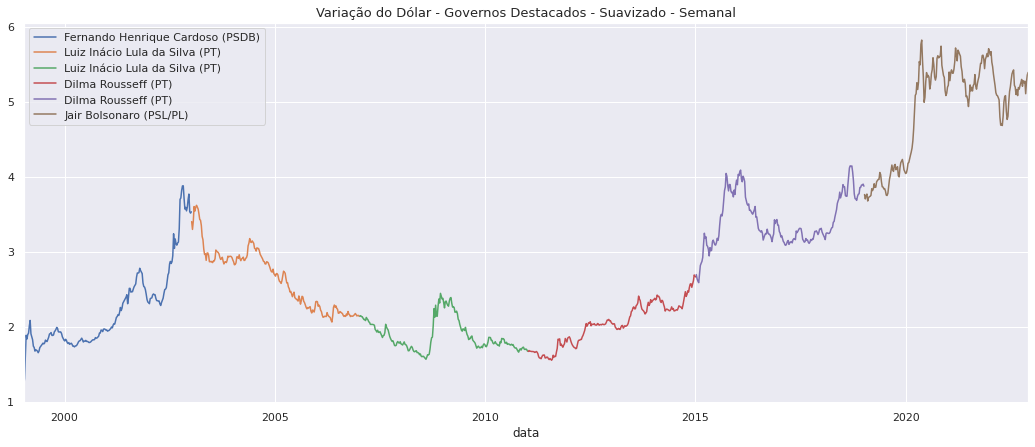

In [6]:
plt.rcParams['figure.figsize'] = (18,7)
plt.title('Variação do Dólar - Governos Destacados - Suavizado - Semanal', fontsize=13)
grafico_periodo_suavizado(dolar, '1999-01-01', '2003-01-01')
grafico_periodo_suavizado(dolar, '2003-01-01', '2006-12-31')
grafico_periodo_suavizado(dolar, '2007-01-01', '2010-12-31')
grafico_periodo_suavizado(dolar, '2011-01-01', '2014-12-31')
grafico_periodo_suavizado(dolar, '2015-01-01', '2018-12-31')
grafico_periodo_suavizado(dolar, '2019-01-01', '2022-11-23')
plt.legend(['Fernando Henrique Cardoso (PSDB)','Luiz Inácio Lula da Silva (PT)','Luiz Inácio Lula da Silva (PT)','Dilma Rousseff (PT)','Dilma Rousseff (PT)','Jair Bolsonaro (PSL/PL)'])
plt.show()

**Analisando a Variação do Dólar - Primeiros 12 meses de cada Presidente da República**

Plotamos os datasets *dolar* atribuídos na chamada da função *grafico_periodo( )* junto aos períodos governamentais.

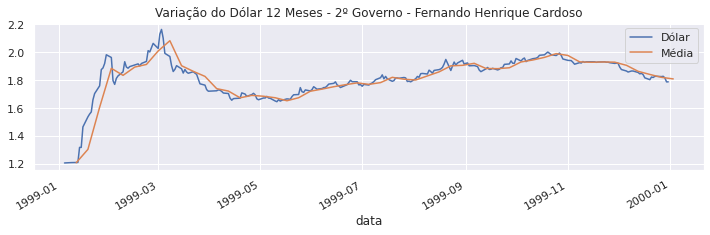

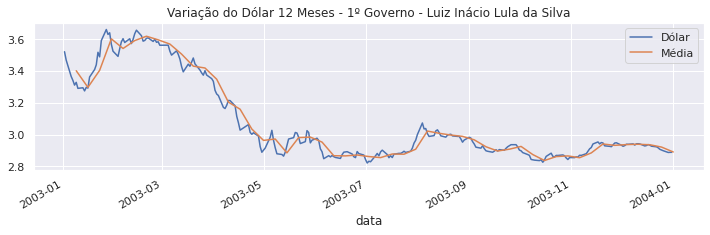

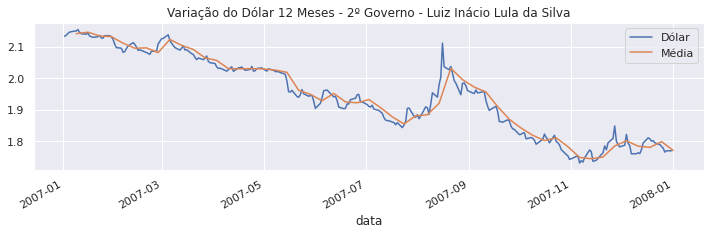

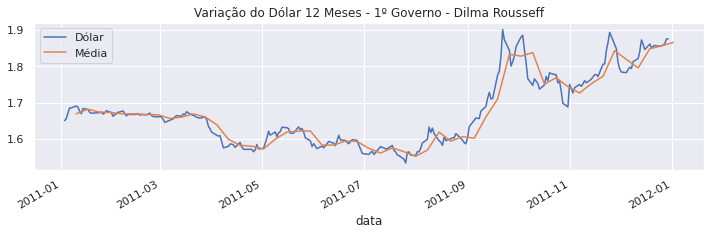

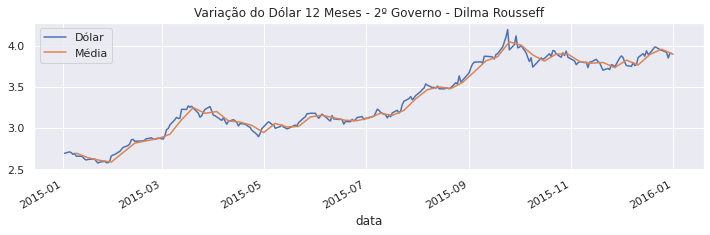

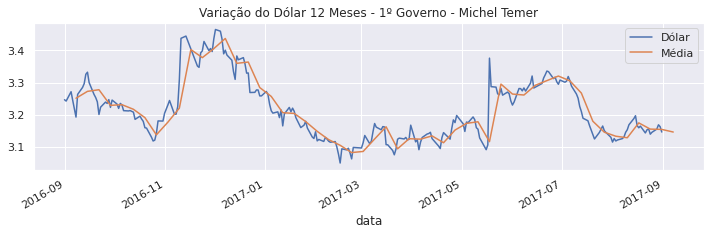

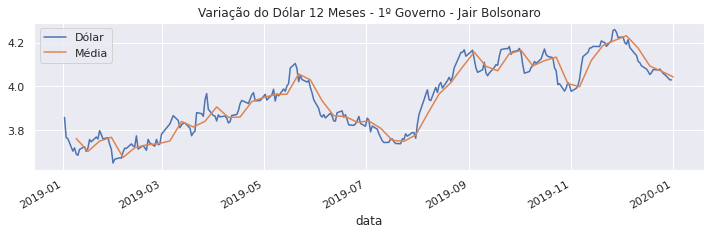

In [8]:
plt.rcParams['figure.figsize'] = (12,3)
plt.title('Variação do Dólar 12 Meses - 2º Governo - Fernando Henrique Cardoso')
grafico_periodo(dolar, '1999-01-01', '1999-12-31')
plt.show()
plt.title('Variação do Dólar 12 Meses - 1º Governo - Luiz Inácio Lula da Silva')
grafico_periodo(dolar, '2003-01-01', '2003-12-31')
plt.show()
plt.title('Variação do Dólar 12 Meses - 2º Governo - Luiz Inácio Lula da Silva')
grafico_periodo(dolar, '2007-01-01', '2007-12-31')
plt.show()
plt.title('Variação do Dólar 12 Meses - 1º Governo - Dilma Rousseff')
grafico_periodo(dolar, '2011-01-01', '2011-12-31')
plt.show()
plt.title('Variação do Dólar 12 Meses - 2º Governo - Dilma Rousseff')
grafico_periodo(dolar, '2015-01-01', '2015-12-31')
plt.show()
plt.title('Variação do Dólar 12 Meses - 1º Governo - Michel Temer')
grafico_periodo(dolar, '2016-09-01', '2017-08-31')
plt.show()
plt.title('Variação do Dólar 12 Meses - 1º Governo - Jair Bolsonaro')
grafico_periodo(dolar, '2019-01-01', '2019-12-31')
plt.show()